<b>OGTIP OESON Data Science Project(Visualisation) </b>
# <center>Project 2</center>

<b>Imports</b>

In [1]:
import pandas as pd 
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import csv
print("done")

done


In [2]:
#Open the dataset HRDataset_v14 
df = pd.read_csv("HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [3]:
#Checking the shape of the dataset
df.shape

(311, 35)

In [4]:
#checking for null values 
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
DateofHire                    0
DateofHire.1                  0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialP

In [5]:
#Description of our dataset 
df[['Salary','SpecialProjectsCount','EngagementSurvey','DaysLateLast30','Absences']].describe().round()

,Salary,SpecialProjectsCount,EngagementSurvey,DaysLateLast30,Absences
count,311.0,311.0,311.0,311.0,311.0
mean,69021.0,1.0,4.0,0.0,10.0
std,25157.0,2.0,1.0,1.0,6.0
min,45046.0,0.0,1.0,0.0,1.0
25%,55502.0,0.0,4.0,0.0,5.0
50%,62810.0,0.0,4.0,0.0,10.0
75%,72036.0,0.0,5.0,0.0,15.0
max,250000.0,8.0,5.0,6.0,20.0



<b>Conclusion from the above description for salary </b>
<br>The most paid employee earns = 250,000
<br>The least paid employee earns = 45,046
<br>On average employees at xyz earn 69,021
<br>From our standard deviation of 25157.0 we can see there is a significant variability in salaries

<b>Conclusion from the above description for Special Project Count for the employees </b>
<br>On average most employees have completed atleast 1 special project
<br>The most special projects completed by an employee is 8 
<br>And we have employees in the firm which havent completed any special project
<br>We can see that the spread between employees who have completed special projects is low with a value of 2

<b>Conclusion from the above description for Engagement survey </b>
<br>The highest number of engagement survey completed by an employee is 5 and the least 1
<br>On average most employees have completed atleast 4 engagement surveys

<b>Conclusion from the above description for days late last 30days  </b>
<br>The most time an employee has been late in the last 30 days is 6 times and the least 0
<br>On average in the last 30days employees are late 0 times


<b>Conclusion from the above description for Absences  </b>
<br>The most time an employee has been Absencent is 20 times and the least 1
<br>On average  employees are absent  10 times all in the last 30days 


<hr>
<u><b>Analysis of Gender distibution in XYZ </b></u>

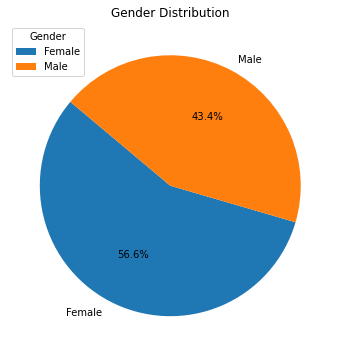

Upon careful examination of the pie chart, it becomes evident that within the organizational structure of XYZ, there exists a
higher representation of female employees in comparison to their male counterparts.


In [62]:
plt.figure(figsize=(8,6))
gender_counts = df['GenderID'].value_counts()
gender_labels = ['Female', 'Male']
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.legend(title="Gender",loc='upper left')

plt.show()
print("Upon careful examination of the pie chart, it becomes evident that within the organizational structure of XYZ, there exists a\nhigher representation of female employees in comparison to their male counterparts.")

<Figure size 576x432 with 0 Axes>

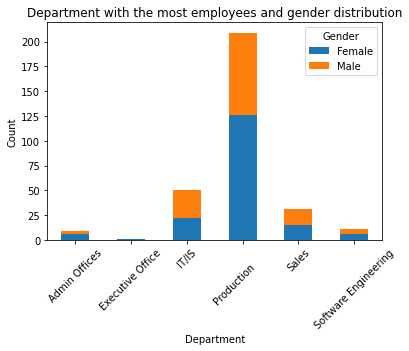

Upon careful examination, it is evident that the Production department not only boasts the largest workforce within the
organization but also commands the highest representation of both male and female employees across all departments. It is
noteworthy that within the Production department, the female cohort prevails in larger numbers compared to the male workforce. Conversely, the Executive Office department stands as the department with the most limited workforce, exclusively composed of
female employees.


In [109]:
#plot for gender distibution for each department A
plt.figure(figsize=(8,6))
gender_counts = df.groupby('Department')['GenderID'].value_counts().unstack()
gender_counts.plot(kind='bar', stacked=True)
plt.title("Department with the most employees and gender distribution")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.legend(title="Gender", labels=gender_labels)

plt.show()
print("Upon careful examination, it is evident that the Production department not only boasts the largest workforce within the\norganization but also commands the highest representation of both male and female employees across all departments. It is\nnoteworthy that within the Production department, the female cohort prevails in larger numbers compared to the male workforce. Conversely, the Executive Office department stands as the department with the most limited workforce, exclusively composed of\nfemale employees.")

<Figure size 576x432 with 0 Axes>

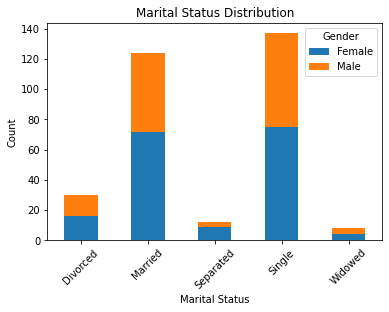

Upon a thorough examination of the marital status distribution within the organization, a clear pattern emerges. The data
reveals that a substantial portion of the workforce identifies as single, with females outnumbering males in this category.
Additionally, it is noteworthy that there exists a comparatively small segment of the employee population who have experienced the loss of a significant other.


In [96]:
Marital_status = df.groupby('MaritalDesc')['GenderID'].value_counts().unstack()
plt.figure(figsize=(8, 6))
Marital_status.plot(kind ='bar', stacked=True )
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)  
plt.legend(title="Gender", labels=gender_labels)
plt.show()

print("Upon a thorough examination of the marital status distribution within the organization, a clear pattern emerges. The data\nreveals that a substantial portion of the workforce identifies as single, with females outnumbering males in this category.\nAdditionally, it is noteworthy that there exists a comparatively small segment of the employee population who have experienced the loss of a significant other.")

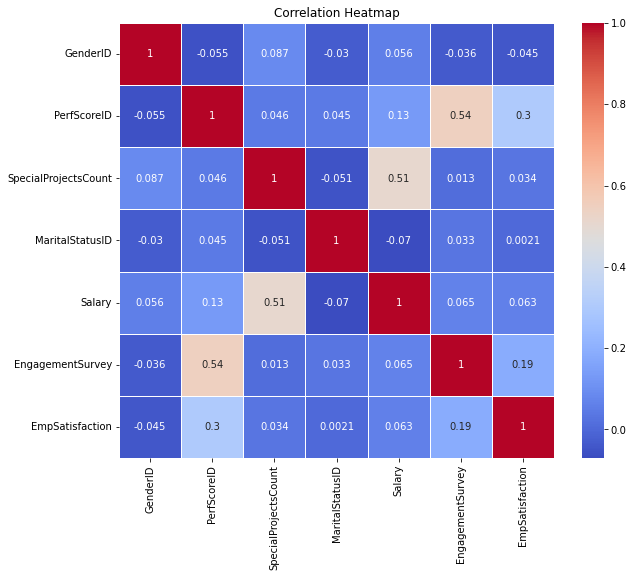

It is evident from the data that there are notable correlations between specific pairs of factors. Particularly, a positive
correlation is observed between employee engagement survey scores and performance scores, suggesting that higher engagement 
tends to align with better performance. Additionally, a positive relationship is evident between salary and the number of 
special projects completed by employees, indicating that employees with higher salaries tend to be involved in more special 
projects, possibly reflecting their higher level of responsibility and contributions to the organization.


In [106]:
# Calculate the correlation matrix
corr_matrix = df[['GenderID','PerfScoreID','SpecialProjectsCount','MaritalStatusID', 'Salary', 'EngagementSurvey', 'EmpSatisfaction']].corr()


# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print("It is evident from the data that there are notable correlations between specific pairs of factors. Particularly, a positive\ncorrelation is observed between employee engagement survey scores and performance scores, suggesting that higher engagement \ntends to align with better performance. Additionally, a positive relationship is evident between salary and the number of \nspecial projects completed by employees, indicating that employees with higher salaries tend to be involved in more special \nprojects, possibly reflecting their higher level of responsibility and contributions to the organization.")

<hr>
<b>Employement status in the organisation </b>



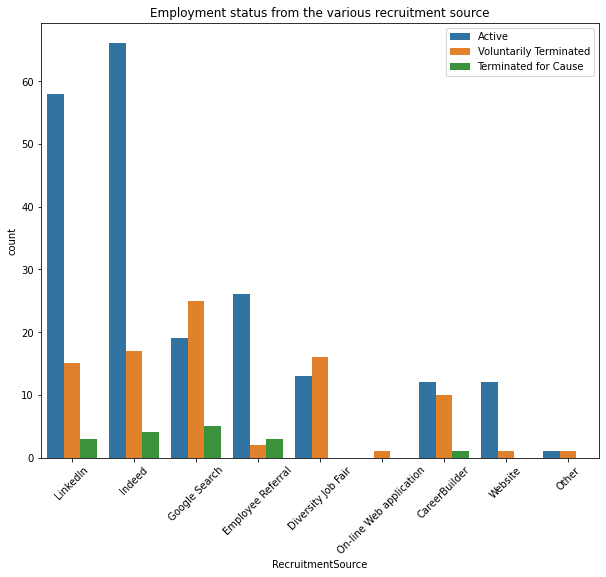

Based on the analysis, it is evident that the organization exhibits the highest employment rate and, concomitantly, the most
noteworthy retention rate. A substantial proportion of individuals initially employed by the company via the Indeed recruitment
source remain actively engaged within the organization, thereby underscoring the effectiveness of this channel in attracting
and retaining talent.


In [110]:
count_empsts = plt.figure(figsize=(10,8))
sns.countplot(x= 'RecruitmentSource', data = df, hue='EmploymentStatus' )
plt.title('Employment status from the various recruitment source')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
print("Based on the analysis, it is evident that the organization exhibits the highest employment rate and, concomitantly, the most\nnoteworthy retention rate. A substantial proportion of individuals initially employed by the company via the Indeed recruitment\nsource remain actively engaged within the organization, thereby underscoring the effectiveness of this channel in attracting\nand retaining talent.")

<Figure size 576x432 with 0 Axes>

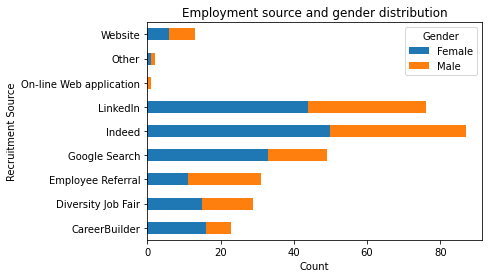

Upon careful analysis of the data, it is evident that the predominant recruitment source for XYZ Technologies is the 'Indeed'
platform, where the female gender consistently represents the majority of the recruited workforce. It is noteworthy that online
web applications contribute to a comparatively lower proportion of the company's recruitment efforts.


In [111]:
#plot for gender distibution for each department 
plt.figure(figsize=(8,6))
gender_counts = df.groupby('RecruitmentSource')['GenderID'].value_counts().unstack()
gender_counts.plot(kind='barh', stacked=True)
plt.title("Employment source and gender distribution")
plt.xlabel("Count")
plt.ylabel("Recruitment Source")
plt.legend(title="Gender", labels=gender_labels)

plt.show()

print("Upon careful analysis of the data, it is evident that the predominant recruitment source for XYZ Technologies is the 'Indeed'\nplatform, where the female gender consistently represents the majority of the recruited workforce. It is noteworthy that online\nweb applications contribute to a comparatively lower proportion of the company's recruitment efforts.")

<hr>
<u><b>Analysis of Salary distibution in XYZ </b></u>

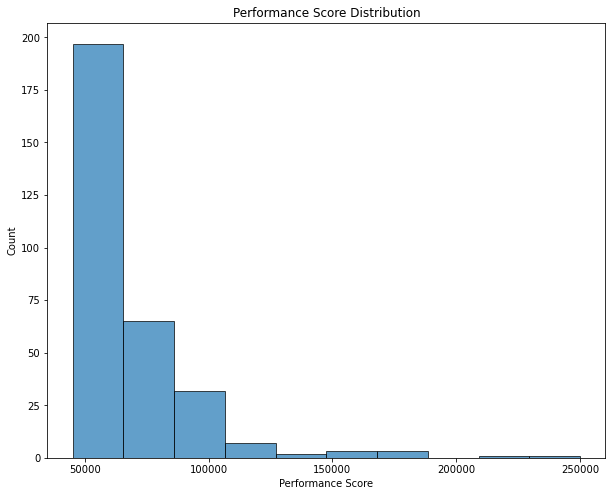

The histogram presented provides a salient visualization, offering a comprehensive depiction of the predominant salary range
within the organizational workforce. It effectively underscores the concentration of employees' compensation levels.


In [98]:
# Create a histogram of salary count
plt.figure(figsize=(10, 8))
plt.hist(df['Salary'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Salary count')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.show()

print("The histogram presented provides a salient visualization, offering a comprehensive depiction of the predominant salary range\nwithin the organizational workforce. It effectively underscores the concentration of employees' compensation levels.")

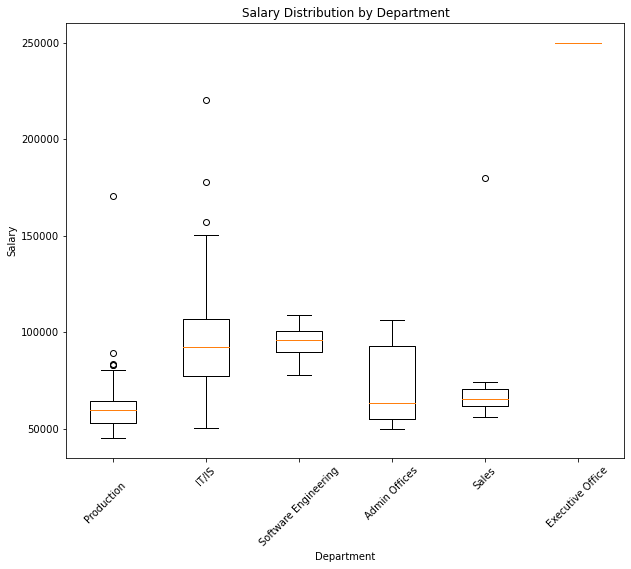

Upon close examination of the boxplot diagram, it becomes evident that within XYZ Technologies, the Software Engineering
department showcases a notable distinction, boasting the highest base and average salaries, next in line after the Executive
team. Conversely, the Production department exhibits the lowest base and average salary levels. Remarkably, the chart 
highlights a significant outlier in the executive compensation category, signifying the presence of an exceptionally 
well-compensated executive within the company.


In [99]:
#Create a box plot for salaries across each department 

plt.figure(figsize=(10,8))
plt.boxplot([df['Salary'][df['Department'] == department] for department in df['Department'].unique()], labels=df['Department'].unique())
plt.xticks(rotation=45)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

print("Upon close examination of the boxplot diagram, it becomes evident that within XYZ Technologies, the Software Engineering\ndepartment showcases a notable distinction, boasting the highest base and average salaries, next in line after the Executive\nteam. Conversely, the Production department exhibits the lowest base and average salary levels. Remarkably, the chart \nhighlights a significant outlier in the executive compensation category, signifying the presence of an exceptionally \nwell-compensated executive within the company.")

<b>Performance across the department</b>

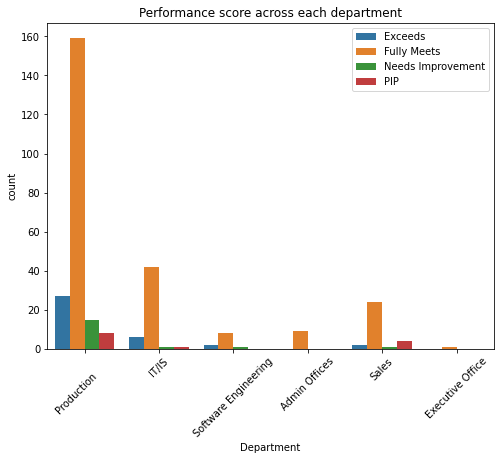

Based on the visual representation above, it is evident that the Production department not only consistently meets the demands of the job but also maintains robust productivity levels. This notable achievement is further complemented by a substantial 
representation within the department, indicating a harmonious correlation between departmental performance and a larger 
workforce.


In [91]:
count_empsts = plt.figure(figsize=(8,6))
sns.countplot(x= 'Department', data = df, hue='PerformanceScore' )
plt.title('Performance score across each department')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()
print("Based on the visual representation above, it is evident that the Production department not only consistently meets the demands of the job but also maintains robust productivity levels. This notable achievement is further complemented by a substantial \nrepresentation within the department, indicating a harmonious correlation between departmental performance and a larger \nworkforce.")

<hr>
<b>Conclusion</b>

In conclusion, our analysis of the HR data from XYZ Technologies has provided valuable insights into the organization's workforce and performance. Key takeaways include:
<br>1.The investigation showed that the production department was the most effective department since it continuously received the highest average performance rankings. This might be used as a standard by other departments.
<br>2.With about equal numbers of male and female employees, the company maintains a balanced gender blend. This hints at a dedication to gender diversity.
<br>3.The organization's remuneration varies significantly, as seen by the standard deviation of wages, which is 25,157. To ensure justice and fairness in pay practises, this has to be further investigated.
<br>4.The number of special projects that are completed and employee wages are positively correlated, suggesting that higher-paid personnel are more involved in strategic initiatives.
<br>5.Positive correlations between special project completion rates and employee salaries imply that higher-paid employees are more actively involved in strategic efforts.

<br>The key results are summarised in this conclusion, which also offers suggestions for XYZ Technologies' strategic planning and HR management.


